# Week3 Assignment
# FENG QINGTIAN

### 1. First, we import several dependencies such as pandas, numpy, seaborn, and also several modules in scikit-learn. We also going to read the Iris CSV file using pandas.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz
from sklearn import preprocessing

df = pd.read_csv('wdbc.csv')


### 2. After importing the data, let’s check whether we have null values in our dataset or not. We will see there are no null/missing values.

In [2]:
df.isnull().any()

ID_Number             False
Diagnosis             False
radius1               False
radius2               False
radius3               False
texture1              False
texture2              False
texture3              False
perimeter1            False
perimeter2            False
perimeter3            False
area1                 False
area2                 False
area3                 False
smoothness1           False
smoothness2           False
smoothness3           False
compactness1          False
compactness2          False
compactness3          False
concavity1            False
concavity2            False
concavity3            False
concave_points1       False
concave_points2       False
concave_points3       False
symmetry1             False
symmetry2             False
symmetry3             False
fractal_dimension1    False
fractal_dimension2    False
fractal_dimension3    False
dtype: bool

### 3. Let's understand more about the data. We will start by getting to know the type of each column values.  We see that the width and length column are represented using float64 and the name of the species uses object or string.



In [3]:
df.dtypes

ID_Number               int64
Diagnosis               int64
radius1               float64
radius2               float64
radius3               float64
texture1              float64
texture2              float64
texture3              float64
perimeter1            float64
perimeter2            float64
perimeter3            float64
area1                 float64
area2                 float64
area3                 float64
smoothness1           float64
smoothness2           float64
smoothness3           float64
compactness1          float64
compactness2          float64
compactness3          float64
concavity1            float64
concavity2            float64
concavity3            float64
concave_points1       float64
concave_points2       float64
concave_points3       float64
symmetry1             float64
symmetry2             float64
symmetry3             float64
fractal_dimension1    float64
fractal_dimension2    float64
fractal_dimension3    float64
dtype: object

### 4. Let’s look at a quick summary of the data.

In [4]:
df.describe()

,ID_Number,Diagnosis,radius1,radius2,radius3,texture1,texture2,texture3,perimeter1,perimeter2,...,concavity3,concave_points1,concave_points2,concave_points3,symmetry1,symmetry2,symmetry3,fractal_dimension1,fractal_dimension2,fractal_dimension3
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### 5. Everything checks out. 
#### SVM1: SVM with linear kernel
#### SVM2: SVM with RBF kernel
#### SVM3: Same as SVM2 but with regularization (soft margin), vary C and report your best results.
### step
1. load the data
2. calculate the best C(The penalty term of the relaxation coefficient)
3. loop 20 times for calculating the SVM1,2,3 and compare them

In [5]:
X = df[['radius1', 'radius2', 'radius3', 'texture1','texture2','texture3','perimeter1','perimeter2','perimeter3',
                  'area1','area2','area3','smoothness1','smoothness2','smoothness3',
                  'compactness1','compactness2','compactness3',
                  'concavity1','concavity2','concavity3',
                  'concave_points1','concave_points2','concave_points3',
                  'symmetry1','symmetry2','symmetry3',
                  'fractal_dimension1','fractal_dimension2','fractal_dimension3']].values
Y = df['Diagnosis'].values
(Xtrain,Xtest,Ytrain,Ytest)=train_test_split(X, Y, test_size=0.3)# train data : test data = 7:3

0.9122807017543859 4.553939393939394


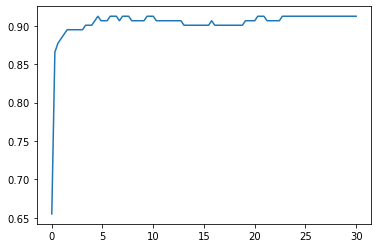

In [6]:
#vary C
score = []
C_range = np.linspace(0.01,30,100)
for i in C_range:
    clf = SVC(kernel="rbf",C=i).fit(Xtrain,Ytrain)
    score.append(clf.score(Xtest,Ytest))
    
print(max(score), C_range[score.index(max(score))])
plt.plot(C_range,score)
plt.show()

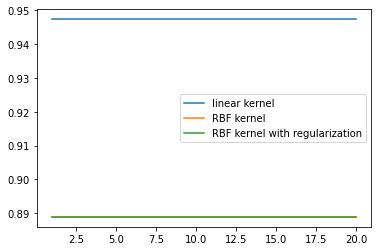

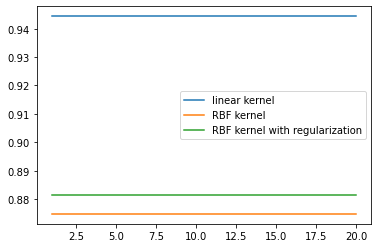

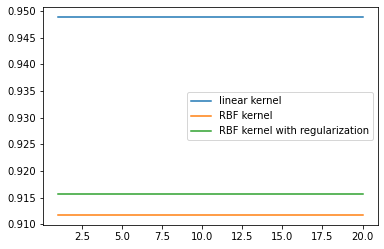

Average Performance
For linear kernel, Accuracy(train):0.972361809045226 Accuracy(test):0.9473684210526313  Precision:0.9443750000000002  Recall rate:0.9488636363636365
For RBF kernel, Accuracy(train):0.9145728643216081 Accuracy(test):0.888888888888889 Precision:0.8747916666666666  Recall rate:0.9117332926457126
For RBF kernel with regularization, Accuracy(train):0.9321608040201005 Accuracy(test):0.8947368421052632 Precision:0.8814583333333333  Recall rate:0.9156325665859562


In [7]:
acc_model_1_train = []
acc_model_1_test = []
acc_model_2_train = []
acc_model_2_test = []
acc_model_3_train = []
acc_model_3_test = []
pre_model1 = []
pre_model2 = []
pre_model3 = []
recall_model1 = []
recall_model2 = []
recall_model3 = []

for i in range(0,20):
    svm_model_1 = SVC(kernel = 'linear')
    svm_model_2 = SVC(kernel='rbf')
    svm_model_3 = SVC(kernel="rbf",C=2.736)# the above code block had calculated the best C
    
    svm_model_1 = svm_model_1.fit(Xtrain,Ytrain)
    svm_model_2 = svm_model_2.fit(Xtrain,Ytrain)
    svm_model_3 = svm_model_3.fit(Xtrain,Ytrain)
    
    score_1_train = svm_model_1.score(Xtrain,Ytrain) 
    score_1_test = svm_model_1.score(Xtest,Ytest) 
    precision_1 = svm_model_1.predict(Xtest)
    
    score_2_train = svm_model_2.score(Xtrain,Ytrain)
    score_2_test = svm_model_2.score(Xtest,Ytest)
    precision_2 = svm_model_2.predict(Xtest)
    
    score_3_train = svm_model_3.score(Xtrain,Ytrain)
    score_3_test = svm_model_3.score(Xtest,Ytest)
    precision_3 = svm_model_3.predict(Xtest)
    
    acc_model_1_train.append(score_1_train)
    acc_model_1_test.append(score_1_test)
    pre_model1.append(precision_score(precision_1, Ytest, average='macro'))
    recall_model1.append(recall_score(precision_1, Ytest, average='macro'))
 
    acc_model_2_train.append(score_2_train)
    acc_model_2_test.append(score_2_test)
    pre_model2.append(precision_score(precision_2, Ytest, average='macro'))
    recall_model2.append(recall_score(precision_2, Ytest, average='macro'))
    
    acc_model_3_train.append(score_3_train)
    acc_model_3_test.append(score_3_test)
    pre_model3.append(precision_score(precision_3, Ytest, average='macro'))
    recall_model3.append(recall_score(precision_3, Ytest, average='macro'))
    
plt.plot(range(1,21),acc_model_1_test,label = "linear kernel")
plt.plot(range(1,21),acc_model_2_test,label = "RBF kernel")
plt.plot(range(1,21),acc_model_2_test,label = "RBF kernel with regularization")
plt.legend()
plt.show()

plt.plot(range(1,21),pre_model1,label = "linear kernel")
plt.plot(range(1,21),pre_model2,label = "RBF kernel")
plt.plot(range(1,21),pre_model3,label = "RBF kernel with regularization")
plt.legend()
plt.show()

plt.plot(range(1,21),recall_model1,label = "linear kernel")
plt.plot(range(1,21),recall_model2,label = "RBF kernel")
plt.plot(range(1,21),recall_model3,label = "RBF kernel with regularization")
plt.legend()
plt.show()

print('Average Performance')
print('For linear kernel, Accuracy(train):{}'.format(np.mean(acc_model_1_train)),'Accuracy(test):{}'.format(np.mean(acc_model_1_test)),
      ' Precision:{}'.format(np.mean(pre_model1)),' Recall rate:{}'.format(np.mean(recall_model1)))
print('For RBF kernel, Accuracy(train):{}'.format(np.mean(acc_model_2_train)),'Accuracy(test):{}'.format(np.mean(acc_model_2_test))
      ,'Precision:{}'.format(np.mean(pre_model2)),' Recall rate:{}'.format(np.mean(recall_model2)))
print('For RBF kernel with regularization, Accuracy(train):{}'.format(np.mean(acc_model_3_train)),'Accuracy(test):{}'.format(np.mean(acc_model_3_test))
      ,'Precision:{}'.format(np.mean(pre_model3)),' Recall rate:{}'.format(np.mean(recall_model3)))

we choose macro to compute the precision and recall rate, next code block will give other methods

In [8]:
svm_model_1 = SVC(kernel = 'linear').fit(Xtrain,Ytrain)
svm_model_2 = SVC(kernel='rbf').fit(Xtrain,Ytrain)
svm_model_3 = SVC(kernel="rbf",C=2.736).fit(Xtrain,Ytrain)# the above code block had calculated the best C

precision_1 = svm_model_1.predict(Xtest)
precision_2 = svm_model_2.predict(Xtest)
precision_3 = svm_model_2.predict(Xtest)

print('              macro              micro             weighted                none')
print('For Precision')
print('linear: ',precision_score(precision_1, Ytest, average='macro'),precision_score(precision_1, Ytest, average='micro'),
     precision_score(precision_1, Ytest, average='weighted'),precision_score(precision_1, Ytest, average=None)) 

print('RBF:    ',precision_score(precision_2, Ytest, average='macro'),precision_score(precision_2, Ytest, average='micro'),
     precision_score(precision_2, Ytest, average='weighted'),precision_score(precision_2, Ytest, average=None)) 

print('RBF(C): ',precision_score(precision_3, Ytest, average='macro'),precision_score(precision_3, Ytest, average='micro'),
     precision_score(precision_3, Ytest, average='weighted'),precision_score(precision_3, Ytest, average=None)) 

print('For Recall')
print('linear: ',recall_score(precision_1, Ytest, average='macro'),recall_score(precision_1, Ytest, average='micro'),
     recall_score(precision_1, Ytest, average='weighted'),recall_score(precision_1, Ytest, average=None)) 

print('RBF:    ',recall_score(precision_2, Ytest, average='macro'),recall_score(precision_2, Ytest, average='micro'),
     recall_score(precision_2, Ytest, average='weighted'),recall_score(precision_2, Ytest, average=None)) 

print('RBF(C): ',recall_score(precision_3, Ytest, average='macro'),recall_score(precision_3, Ytest, average='micro'),
     recall_score(precision_2, Ytest, average='weighted'),recall_score(precision_2, Ytest, average=None))



              macro              micro             weighted                none
For Precision
linear:  0.944375 0.9473684210526315 0.9482236842105264 [0.92    0.96875]
RBF:     0.8747916666666666 0.8888888888888888 0.911712962962963 [0.76       0.98958333]
RBF(C):  0.8747916666666666 0.8888888888888888 0.911712962962963 [0.76       0.98958333]
For Recall
linear:  0.9488636363636365 0.9473684210526315 0.9473684210526315 [0.95833333 0.93939394]
RBF:     0.9117332926457125 0.8888888888888888 0.8888888888888888 [0.98275862 0.84070796]
RBF(C):  0.9117332926457125 0.8888888888888888 0.8888888888888888 [0.98275862 0.84070796]
